In [5]:

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
car_data = pd.read_csv(r'realcar.csv')


In [7]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
car_data.drop(car_data[car_data['seats'] == 2].index, inplace=True)

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8126 non-null   object 
 1   year           8126 non-null   int64  
 2   selling_price  8126 non-null   int64  
 3   km_driven      8126 non-null   int64  
 4   fuel           8126 non-null   object 
 5   seller_type    8126 non-null   object 
 6   transmission   8126 non-null   object 
 7   owner          8126 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7911 non-null   object 
 11  torque         7904 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.8+ KB


In [10]:
car_data.drop(columns=['torque'],inplace=True)

In [11]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [12]:
car_data.shape


(8126, 12)

In [13]:
car_data.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [14]:
car_data.dropna(inplace=True)

In [15]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [16]:
car_data.shape

(7905, 12)

In [17]:
car_data.duplicated().sum()

np.int64(1189)

In [18]:
car_data.drop_duplicates(inplace=True)

In [19]:
car_data.duplicated().sum()

np.int64(0)

In [20]:
car_data.shape

(6716, 12)

In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6716 non-null   object 
 1   year           6716 non-null   int64  
 2   selling_price  6716 non-null   int64  
 3   km_driven      6716 non-null   int64  
 4   fuel           6716 non-null   object 
 5   seller_type    6716 non-null   object 
 6   transmission   6716 non-null   object 
 7   owner          6716 non-null   object 
 8   mileage        6716 non-null   object 
 9   engine         6716 non-null   object 
 10  max_power      6716 non-null   object 
 11  seats          6716 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.1+ KB


In [22]:
for col in car_data.columns:
    print(f"Unique values in column '{col}':")
    print(car_data[col].unique())
    print("=" * 30)

Unique values in column 'name':
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values in column 'year':
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values in column 'selling_price':
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   61000

In [23]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [24]:
def clean_data(value):
    # Convert to string if it isn't already
    value = str(value)

    # Split and get first part (handles cases like "23.4 kmpl")
    value = value.split(' ')[0]

    # Clean whitespace
    value = value.strip()

    # Handle empty strings
    if value == '':
        return 0.0

    # Convert to float (will handle both "23.4" and 23.4)
    try:
        return float(value)
    except ValueError:
        return 0.0  # or np.nan if you prefer

In [25]:
car_data['name'] = car_data['name'].apply(get_brand_name)

In [26]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [27]:
car_data['mileage'] = car_data['mileage'].apply(clean_data)

In [28]:
car_data['max_power']=car_data['max_power'].apply(clean_data)

In [29]:
car_data['engine']=car_data['engine'].apply(clean_data)

In [30]:
for col in car_data.columns:
    print(f"Unique values in column '{col}':")
    print(car_data[col].unique())
    print("=" * 30)

Unique values in column 'name':
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values in column 'year':
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values in column 'selling_price':
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   5

In [31]:
car_data['name'].replace(
    ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Mahindra',
     'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Audi',
     'Volkswagen', 'BMW', 'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
     'Kia', 'Fiat', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],inplace=True
   
)

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\1111662170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['name'].replace(
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\1111662170.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['name'].replace(


In [32]:
car_data['transmission'] = car_data['transmission'].replace(['Manual', 'Automatic'], [1, 2])



C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\4270463685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['transmission'] = car_data['transmission'].replace(['Manual', 'Automatic'], [1, 2])


In [33]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,1,First Owner,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,Individual,1,Second Owner,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,Individual,1,Third Owner,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,Individual,1,First Owner,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,Individual,1,First Owner,16.10,1298.0,88.20,5.0


In [34]:

car_data['owner'] = car_data['owner'].replace(
    ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],
    [1, 2, 3, 4, 5]
).infer_objects(copy=False)  # ✅ fixes the warning



C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\4095434731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['owner'] = car_data['owner'].replace(


In [35]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6716 non-null   int64  
 1   year           6716 non-null   int64  
 2   selling_price  6716 non-null   int64  
 3   km_driven      6716 non-null   int64  
 4   fuel           6716 non-null   object 
 5   seller_type    6716 non-null   object 
 6   transmission   6716 non-null   int64  
 7   owner          6716 non-null   int64  
 8   mileage        6716 non-null   float64
 9   engine         6716 non-null   float64
 10  max_power      6716 non-null   float64
 11  seats          6716 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.1+ KB


In [36]:
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,Diesel,Individual,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,Diesel,Individual,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,Petrol,Individual,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,Diesel,Individual,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,Petrol,Individual,1,1,16.10,1298.0,88.20,5.0
5,4,2017,440000,45000,Petrol,Individual,1,1,20.14,1197.0,81.86,5.0
6,1,2007,96000,175000,LPG,Individual,1,1,17.30,1061.0,57.50,5.0
7,1,2001,45000,5000,Petrol,Individual,1,2,16.10,796.0,37.00,4.0
8,5,2011,350000,90000,Diesel,Individual,1,1,23.59,1364.0,67.10,5.0
9,6,2013,200000,169000,Diesel,Individual,1,1,20.00,1399.0,68.10,5.0


In [37]:
car_data['fuel'] = car_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [1, 2, 3, 4])

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\2231973951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['fuel'] = car_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [1, 2, 3, 4])


In [38]:
car_data['seller_type'] = car_data['seller_type'].replace( ['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3] )



C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_27084\1612948309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['seller_type'] = car_data['seller_type'].replace( ['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3] )


In [39]:
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
5,4,2017,440000,45000,2,1,1,1,20.14,1197.0,81.86,5.0
6,1,2007,96000,175000,3,1,1,1,17.30,1061.0,57.50,5.0
7,1,2001,45000,5000,2,1,1,2,16.10,796.0,37.00,4.0
8,5,2011,350000,90000,1,1,1,1,23.59,1364.0,67.10,5.0
9,6,2013,200000,169000,1,1,1,1,20.00,1399.0,68.10,5.0


In [40]:
car_data.reset_index(inplace=True)


In [41]:
car_data.head(10)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
5,5,4,2017,440000,45000,2,1,1,1,20.14,1197.0,81.86,5.0
6,6,1,2007,96000,175000,3,1,1,1,17.30,1061.0,57.50,5.0
7,7,1,2001,45000,5000,2,1,1,2,16.10,796.0,37.00,4.0
8,8,5,2011,350000,90000,1,1,1,1,23.59,1364.0,67.10,5.0
9,9,6,2013,200000,169000,1,1,1,1,20.00,1399.0,68.10,5.0


In [42]:
car_data.drop(columns=['index'], inplace=True)


In [43]:
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
5,4,2017,440000,45000,2,1,1,1,20.14,1197.0,81.86,5.0
6,1,2007,96000,175000,3,1,1,1,17.30,1061.0,57.50,5.0
7,1,2001,45000,5000,2,1,1,2,16.10,796.0,37.00,4.0
8,5,2011,350000,90000,1,1,1,1,23.59,1364.0,67.10,5.0
9,6,2013,200000,169000,1,1,1,1,20.00,1399.0,68.10,5.0


In [44]:
input_data=car_data.drop(columns=['selling_price'])

In [45]:
output_data=car_data['selling_price']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,)

In [47]:
# Replace problematic strings with NaN then fill with 0 or mean
x_test = x_test.replace('**', np.nan).fillna(0)

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
xgb=GradientBoostingRegressor()
xgb.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [49]:

y1 = lr.predict(x_test)  
y2 = rf.predict(x_test)  
y3 = xgb.predict(x_test) 


score1 = metrics.r2_score(y_test, y1)
score2 = metrics.r2_score(y_test, y2)
score3 = metrics.r2_score(y_test, y3)

In [50]:
print(score1,score2,score3)

0.6131661915590583 0.9268278330042327 0.9235995105224912


In [51]:
final_data = pd.DataFrame({'Models':['LR','RF','GB'],
             "R2score":[score1,score2,score3]})

In [52]:
final_data

,Models,R2score
0,LR,0.613166
1,RF,0.926828
2,GB,0.923600


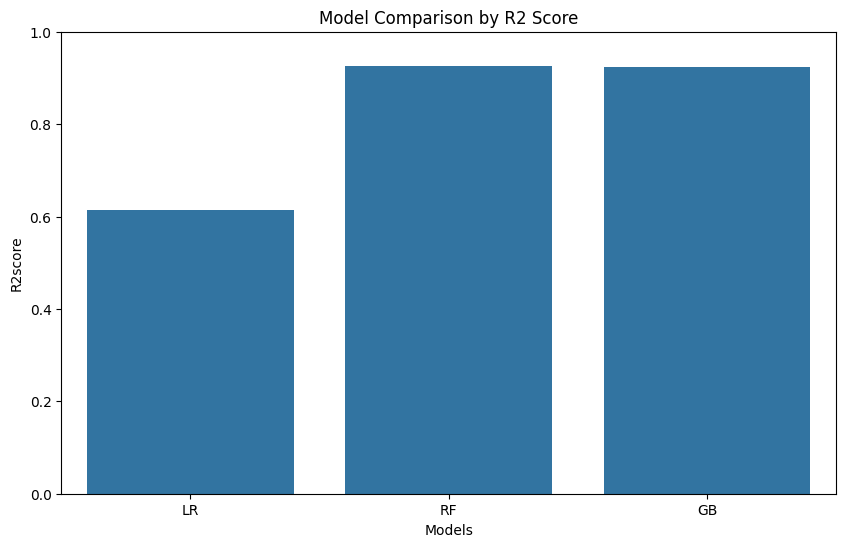

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='R2score', data=final_data)
plt.title('Model Comparison by R2 Score')
plt.ylim(0, 1)  
plt.show()

In [54]:
model=RandomForestRegressor()
model=rf.fit(input_data,output_data)

In [55]:
input_data_model = pd.DataFrame(
    [[28, 2022, 6000, 1, 1, 1, 2, 12.8, 1995.0, 52.0, 4.0]],
    columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])



In [56]:
model.predict(input_data_model)

array([807300.])

In [57]:

import pickle as pk


In [58]:
pk.dump(model,open('ocarmodel.pkl','wb'))

In [59]:
import pickle as pk
import gzip

with gzip.open('ocarmodel_compressed.pkl.gz', 'wb') as f:
    pk.dump(model, f)
